In [1]:
import Pkg
Pkg.add("POMDPs")
Pkg.add("POMDPModelTools")
Pkg.add("POMDPSimulators")
Pkg.add("POMDPPolicies")
Pkg.add("POMDPToolbox")
Pkg.add("POMDPModels")
Pkg.add("QMDP");
Pkg.add("DiscreteValueIteration")
Pkg.add("FIB")
Pkg.add("Statistics")
Pkg.add("Plots")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
Precompiling project...
  ✓ Reexport
  ✓ POMDPTesting
  ✓ Colors
  ✓ PrettyTables
  ✓ Compose
  ✓ FreeTypeAbstraction
  ✓ ColorSchemes
  ✓ PlotUtils
  ✓ RecipesPipeline
  ✓ PlotThemes
  ✓ UnicodePlots
  ✓ POMDPModelTools
  ✓ DataFrames
  ✓ BeliefUpdaters
  ✓ POMDPXFiles
  ✓ QuickPOMDPs
  ✓ POMDPFiles
  ✓ POMDPPolicies
  ✓ POMDPModels
  ✓ FIB
  ✓ DiscreteValueIteration
  ✓ SARSOP
  ✓ Plots
  ✓ POMDPSimulators
  ✓ POMDPSolve
  ✓ QMDP
  ✓ AEMS
  27 dependencies successfully precompiled in 216 seconds. 186 already precompiled.
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.

In [2]:
using POMDPs
using POMDPModelTools
using POMDPSimulators
using POMDPPolicies
using QMDP
using DiscreteValueIteration
using FIB
using Statistics
using Plots

In [3]:
Pkg.add(url="https://github.com/JuliaPOMDP/AEMS.jl")

    Updating git-repo `https://github.com/JuliaPOMDP/AEMS.jl`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [4]:
using AEMS

In [5]:
Pkg.add("SARSOP")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [6]:
using SARSOP

In [7]:
Pkg.add("POMDPSolve")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [8]:
using POMDPSolve

In [9]:
struct CancerScreeningState 
    state::Symbol # healthy, cancer, treatment, ...
    age::Int64 # age
    done::Bool # when age is 80, that's terminal
end

In [10]:
struct CancerScreeningPOMDP <: POMDP{CancerScreeningState, Bool, Symbol} # {state, action, observation}
    r_healthy::Float64
    r_cancer::Float64
    r_treatment::Float64
    r_remission::Float64
    r_death::Float64
    r_screen::Float64
    discount_factor::Float64
end

In [11]:
POMDPs.states(pomdp::CancerScreeningPOMDP) = [
    CancerScreeningState(:healthy, 30, false),
    CancerScreeningState(:cancer, 30, false),
    CancerScreeningState(:treatment, 30, false),
    CancerScreeningState(:remission, 30, true),
    CancerScreeningState(:death, 30, true),
    CancerScreeningState(:healthy, 40, false),
    CancerScreeningState(:cancer, 40, false),
    CancerScreeningState(:treatment, 40, false),
    CancerScreeningState(:remission, 40, true),
    CancerScreeningState(:death, 40, true),
    CancerScreeningState(:healthy, 50, false),
    CancerScreeningState(:cancer, 50, false),
    CancerScreeningState(:treatment, 50, false),
    CancerScreeningState(:remission, 50, true),
    CancerScreeningState(:death, 50, true),
    CancerScreeningState(:healthy, 60, false),
    CancerScreeningState(:cancer, 60, false),
    CancerScreeningState(:treatment, 60, false),
    CancerScreeningState(:remission, 60, true),
    CancerScreeningState(:death, 60, true),
    CancerScreeningState(:healthy, 70, false),
    CancerScreeningState(:cancer, 70, false),
    CancerScreeningState(:treatment, 70, false),
    CancerScreeningState(:remission, 70, true),
    CancerScreeningState(:death, 70, true),
    CancerScreeningState(:healthy, 80, true),
    CancerScreeningState(:cancer, 80, true),
    CancerScreeningState(:treatment, 80, true),
    CancerScreeningState(:remission, 80, true),
    CancerScreeningState(:death, 80, true)
]

function POMDPs.stateindex(pomdp::CancerScreeningPOMDP, s::CancerScreeningState)
    if s.state == :healthy && s.age == 30
        return 1
    elseif s.state == :cancer && s.age == 30
        return 2
    elseif s.state == :treatment && s.age == 30
        return 3
    elseif s.state == :remission && s.age == 30
        return 4
    elseif s.state == :death && s.age == 30
        return 5
    elseif s.state == :healthy && s.age == 40
        return 6
    elseif s.state == :cancer && s.age == 40
        return 7
    elseif s.state == :treatment && s.age == 40
        return 8
    elseif s.state == :remission && s.age == 40
        return 9
    elseif s.state == :death && s.age == 40
        return 10
    elseif s.state == :healthy && s.age == 50
        return 11
    elseif s.state == :cancer && s.age == 50
        return 12
    elseif s.state == :treatment && s.age == 50
        return 13
    elseif s.state == :remission && s.age == 50
        return 14
    elseif s.state == :death && s.age == 50
        return 15
    elseif s.state == :healthy && s.age == 60
        return 16
    elseif s.state == :cancer && s.age == 60
        return 17
    elseif s.state == :treatment && s.age == 60
        return 18
    elseif s.state == :remission && s.age == 60
        return 19
    elseif s.state == :death && s.age == 60
        return 20
    elseif s.state == :healthy && s.age == 70
        return 21
    elseif s.state == :cancer && s.age == 70
        return 22
    elseif s.state == :treatment && s.age == 70
        return 23
    elseif s.state == :remission && s.age == 70
        return 24
    elseif s.state == :death && s.age == 70
        return 25
    elseif s.state == :healthy && s.age == 80
        return 26
    elseif s.state == :cancer && s.age == 80
        return 27
    elseif s.state == :treatment && s.age == 80
        return 28
    elseif s.state == :remission && s.age == 80
        return 29
    elseif s.state == :death && s.age == 80
        return 30
    end
    error("invalid CancerScreeningPOMDP state: $s")
end;

In [12]:
POMDPs.actions(pomdp::CancerScreeningPOMDP) = [true, false]
POMDPs.actionindex(pomdp::CancerScreeningPOMDP, a::Bool) = a ? 1 : 2

In [13]:
function POMDPs.transition(pomdp::CancerScreeningPOMDP, s::CancerScreeningState, a::Bool)
    state = s.state
    age = s.age
    done = s.done
    new_age = s.age == 80 ? 80 : s.age + 10
    new_done = false
    if new_age == 80
        new_done = true
    elseif state == :death
        new_done = true
    elseif state == :remission
        new_done == true
    end
    
    if done
        return SparseCat([CancerScreeningState(state, new_age, true)], [1.0])
    else
        if state == :healthy # the same for whether we screen or wait
            if age == 30   
                return SparseCat([CancerScreeningState(:healthy, new_age, new_done), CancerScreeningState(:cancer, new_age, new_done)], [0.95, 0.05])
            elseif age == 40    
                return SparseCat([CancerScreeningState(:healthy, new_age, new_done), CancerScreeningState(:cancer, new_age, new_done)], [0.9, 0.1])
            elseif age == 50    
                return SparseCat([CancerScreeningState(:healthy, new_age, new_done), CancerScreeningState(:cancer, new_age, new_done)], [0.8, 0.2])
            elseif age == 60    
                return SparseCat([CancerScreeningState(:healthy, new_age, new_done), CancerScreeningState(:cancer, new_age, new_done)], [0.7, 0.3])
            elseif age == 70    
                return SparseCat([CancerScreeningState(:healthy, new_age, new_done), CancerScreeningState(:cancer, new_age, new_done)], [0.6, 0.4])
            end
        elseif state == :cancer
            if !a # if we wait
                if age == 30
                    return SparseCat([CancerScreeningState(:cancer, new_age, new_done), CancerScreeningState(:death, new_age, true)], [0.8, 0.2])
                elseif age == 40
                    return SparseCat([CancerScreeningState(:cancer, new_age, new_done), CancerScreeningState(:death, new_age, true)], [0.6, 0.4])
                elseif age == 50
                    return SparseCat([CancerScreeningState(:cancer, new_age, new_done), CancerScreeningState(:death, new_age, true)], [0.36, 0.64])
                elseif age == 60
                    return SparseCat([CancerScreeningState(:cancer, new_age, new_done), CancerScreeningState(:death, new_age, true)], [0.3, 0.7])
                elseif age == 70
                    return SparseCat([CancerScreeningState(:cancer, new_age, new_done), CancerScreeningState(:death, new_age, true)], [0.1, 0.9])
                end
            else # if we screen, it will be positive, so we go into treatment
                return SparseCat([CancerScreeningState(:treatment, new_age, new_done)], [1.0])
            end
        elseif state == :treatment 
            if !a # if we wait
                if age == 30
                    return SparseCat([CancerScreeningState(:treatment, new_age, new_done), CancerScreeningState(:death, new_age, true)], [0.9, 0.1])
                elseif age == 40
                    return SparseCat([CancerScreeningState(:treatment, new_age, new_done), CancerScreeningState(:death, new_age, true)], [0.7, 0.3])
                elseif age == 50
                    return SparseCat([CancerScreeningState(:treatment, new_age, new_done), CancerScreeningState(:death, new_age, true)], [0.5, 0.5])
                elseif age == 60
                    return SparseCat([CancerScreeningState(:treatment, new_age, new_done), CancerScreeningState(:death, new_age, true)], [0.4, 0.6])
                elseif age == 70
                    return SparseCat([CancerScreeningState(:treatment, new_age, new_done), CancerScreeningState(:death, new_age, true)], [0.2, 0.8])
                end
            else # if we screen, it can either go into remission or treatment
                if age == 30
                    return SparseCat([CancerScreeningState(:treatment, new_age, new_done), CancerScreeningState(:remission, new_age, true)], [0.05, 0.95])
                elseif age == 40
                    return SparseCat([CancerScreeningState(:treatment, new_age, new_done), CancerScreeningState(:remission, new_age, true)], [0.1, 0.90])
                elseif age == 50
                    return SparseCat([CancerScreeningState(:treatment, new_age, new_done), CancerScreeningState(:remission, new_age, true)], [0.15, 0.85])
                elseif age == 60
                    return SparseCat([CancerScreeningState(:treatment, new_age, new_done), CancerScreeningState(:remission, new_age, true)], [0.20, 0.80])
                elseif age == 70
                    return SparseCat([CancerScreeningState(:treatment, new_age, new_done), CancerScreeningState(:remission, new_age, true)], [0.25, 0.75])
                end
            end
        end
            
    end
end

In [14]:
POMDPs.observations(pomdp::CancerScreeningPOMDP) = [true, false]
POMDPs.obsindex(pomdp::CancerScreeningPOMDP, o::Bool) = o ? 1 : 2

In [15]:
function POMDPs.observation(pomdp::CancerScreeningPOMDP, a::Bool, sp::CancerScreeningState)
    state = sp.state
    age = sp.age
    if a # if we do screen 
        if state == :healthy
            return SparseCat([false], [1.0])
        elseif state == :cancer
            return SparseCat([true], [1.0])
        elseif state == :treatment
            return SparseCat([true], [1.0])
        elseif state == :remission
            return SparseCat([false], [1.0])
        elseif state == :death
            return SparseCat([true], [1.0])
        end
    else
        return BoolDistribution(0.5)
    end
end

In [16]:
function POMDPs.reward(pomdp::CancerScreeningPOMDP, s::CancerScreeningState, a::Bool)
    state = s.state
    r = 0.0
    if state == :healthy
        r += pomdp.r_healthy
    elseif state == :cancer
        r += pomdp.r_cancer
    elseif state == :treatment
        r += pomdp.r_treatment
    elseif state == :remission
        r += pomdp.r_remission
    elseif state == :death
        r += pomdp.r_death
    end
    
    if a
        r += pomdp.r_screen
    end
    
    return r
end

In [17]:
POMDPs.initialstate_distribution(pomdp::CancerScreeningPOMDP) = SparseCat([CancerScreeningState(:healthy, 30, false)], [1.0])

In [18]:
POMDPs.discount(pomdp::CancerScreeningPOMDP) = pomdp.discount_factor

In [59]:
m = CancerScreeningPOMDP(10., -50., -30., 10., -100., -50., 0.95)

# policy that takes a random action
policy1 = RandomPolicy(m)

#offline
solver2 = QMDPSolver()
solver3 = FIBSolver()
solver4 = SARSOPSolver()
solver5 = POMDPSolveSolver()

#online


policy2 = solve(solver2, m)
policy3 = solve(solver3, m)
#policy5 = solve(solver5, m)

rsum = 0.0
for (s, a, r) in stepthrough(m, policy3, "s,a,r", max_steps=6)
    @show s
    @show a
    @show r
    #global rsum += r
    #println(rsum)
end


s = CancerScreeningState(:healthy, 30, false)
a = false
r = 10.0
s = CancerScreeningState(:healthy, 40, false)
a = true
r = -40.0
s = CancerScreeningState(:healthy, 50, false)
a = false
r = 10.0
s = CancerScreeningState(:healthy, 60, false)
a = true
r = -40.0
s = CancerScreeningState(:healthy, 70, false)
a = false
r = 10.0
s = CancerScreeningState(:cancer, 80, true)
a = false
r = -50.0


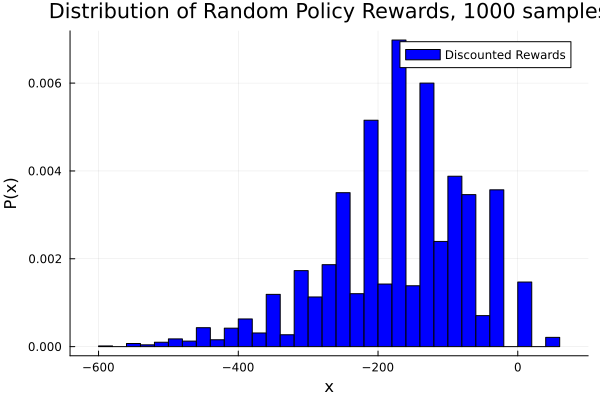

In [55]:
#RANDOM POLICY
v1 = Float64[]
for i in 1:10000
    long = RolloutSimulator(max_steps=6)
    long_dr = simulate(long, m, policy1)
    #@show long_dr;
    append!(v1, long_dr)
end
histogram(v1, label="Discounted Rewards", normalize=:pdf, color=:blue)
title!("Distribution of Random Policy Rewards, 1000 samples")
xlabel!("x")
ylabel!("P(x)")


In [35]:
mean(v1)

-172.25355285687496

In [36]:
std(v1)

104.39837328991239

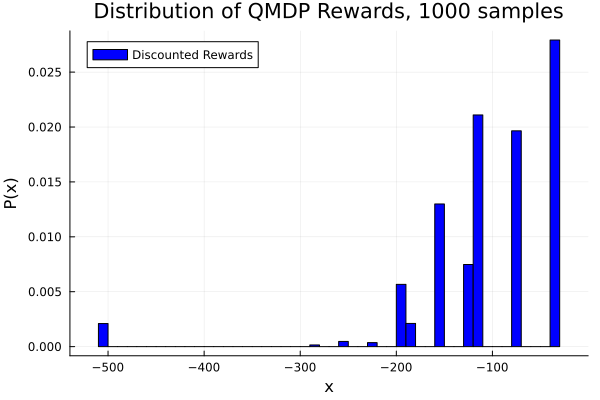

In [37]:
v2 = Float64[]
for i in 1:10000
    long = RolloutSimulator(max_steps=6)
    long_dr = simulate(long, m, policy2)
    #@show long_dr;
    append!(v2, long_dr)
end
histogram(v2, label="Discounted Rewards", normalize=:pdf, color=:blue)
title!("Distribution of QMDP Rewards, 1000 samples")
xlabel!("x")
ylabel!("P(x)")

In [38]:
mean(v2)

-106.19239230624996

In [39]:
std(v2)

77.85623600005918

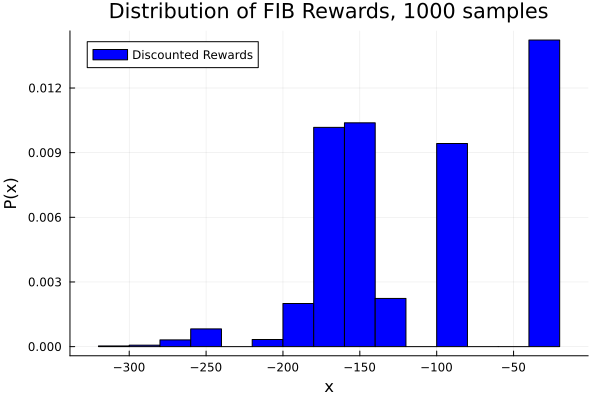

In [40]:
v3 = Float64[]
for i in 1:10000
    long = RolloutSimulator(max_steps=6)
    long_dr = simulate(long, m, policy3)
    #@show long_dr;
    append!(v3, long_dr)
end
histogram(v3, label="Discounted Rewards", normalize=:pdf, color=:blue)
title!("Distribution of FIB Rewards, 1000 samples")
xlabel!("x")
ylabel!("P(x)")

In [41]:
mean(v3)

-114.22454202187501

In [42]:
std(v3)

60.10927314002009